# Pré-processamento dos dados das exportações do RN
## Etapa 2 - Análise de outliers

<img height="200" src="https://share-eric.eu/fileadmin/_processed_/b/5/csm_dataheader_ec9ee966be.jpg" width="600"/>

# Carregando base de dados das exportações do RN após etapa 1 de pre-processamento

In [5]:
import pandas as pd

# Carrega excel em um dataframe
dataset_exportacoes_rn_continente = pd.read_csv('../../../data/interim/preprocessing/01_dataset_expo_rn_data_cleaning.csv')
dataset_exportacoes_rn_continente_outubro = pd.read_csv('../../../data/interim/preprocessing/01_dataset_expo_rn_outubro_data_cleaning.csv')
dataset_exportacoes_rn_continente 

,Bloco Econômico,Países,Via,URF,Código NCM,Descrição NCM,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Código Seção,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data
0,3,117,0,68,13021999,Outros sucos e extratos vegetais,130219,Sucos e extratos de outros vegetais (mamão sec...,57,495,12,27,1,17,8,3,0,0,2024-09-01
1,3,122,0,68,49111090,"Outros impressos publicitários, catálogos come...",491110,"Impressos publicitários, catálogos comerciais ...",229,383,44,33,9,12,8,5,0,0,2024-01-01
2,3,122,0,68,96110000,"Carimbos, incluindo os datadores e numeradores...",961100,"Carimbos, datadores, numeradores, sinetes e ar...",549,98,86,46,18,7,8,5,0,0,2024-01-01
3,3,122,0,68,61071200,"Cuecas e ceroulas, de malha, de uso masculino,...",610712,"Cuecas e ceroulas, de malha, de fibras sintéti...",276,153,55,83,10,6,5,5,0,1,2024-01-01
4,3,122,0,68,61072900,"Camisolões e pijamas, de malha, de uso masculi...",610729,"Camisolões e pijamas, de malha, de outras maté...",276,153,55,83,10,6,5,5,0,1,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57130,6,108,4,41,25010090,"Outros tipos de sal, cloreto de sódio puro e á...",250100,Sal (incluídos o sal de mesa e o sal desnatura...,92,484,23,76,5,18,8,424298,24958710,24959,1997-05-01
57131,1,51,4,41,25010011,"Sal marinho, a granel, sem agregados",250100,Sal (incluídos o sal de mesa e o sal desnatura...,92,484,23,76,5,18,8,341000,31000000,31000,1997-10-01
57132,1,51,4,41,25010011,"Sal marinho, a granel, sem agregados",250100,Sal (incluídos o sal de mesa e o sal desnatura...,92,484,23,76,5,18,8,396000,36000000,36000,1997-08-01
57133,1,51,4,41,25010011,"Sal marinho, a granel, sem agregados",250100,Sal (incluídos o sal de mesa e o sal desnatura...,92,484,23,76,5,18,8,436680,36000000,36000,1997-02-01


# 1. Análise de outliers das colunas 'Valor US$ FOB' e 'Quilograma Líquido'


Análise de Valor US$ FOB:
Q1 (25%): 5100.0
Q2 (Mediana): 23645.0
Q3 (75%): 86374.5
IQR: 81274.5
Limite Inferior para Outliers: -116811.75
Limite Superior para Outliers: 208286.25
Quantidade de Outliers detectados em Valor US$ FOB: 7206

Análise de Quilograma Líquido:
Q1 (25%): 1493.5
Q2 (Mediana): 12944.0
Q3 (75%): 44543.0
IQR: 43049.5
Limite Inferior para Outliers: -63080.75
Limite Superior para Outliers: 109117.25
Quantidade de Outliers detectados em Quilograma Líquido: 8183

Descrição das colunas analisadas:
       Valor US$ FOB  Quilograma Líquido
count   5.713500e+04        5.713500e+04
mean    1.633967e+05        5.897617e+05
std     1.271327e+06        6.669498e+06
min     0.000000e+00        0.000000e+00
25%     5.100000e+03        1.493500e+03
50%     2.364500e+04        1.294400e+04
75%     8.637450e+04        4.454300e+04
max     1.154291e+08        6.116450e+08

Descrição das colunas no dataset sem outliers:
       Valor US$ FOB  Quilograma Líquido
count   46272.000000    

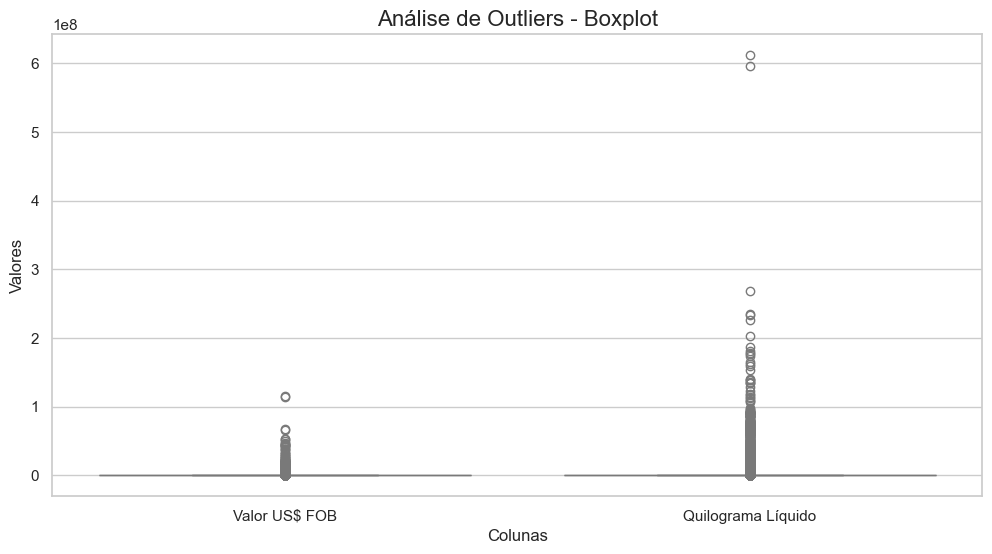

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Escolher as duas colunas que você deseja analisar
colunas_selecionadas = ['Valor US$ FOB', 'Quilograma Líquido']

# Criação de uma nova base de dados sem outliers
dataset_sem_outliers = dataset_exportacoes_rn_continente.copy()

# Calcular quartis e outliers para as colunas selecionadas
for coluna in colunas_selecionadas:
    print(f"\nAnálise de {coluna}:")

    # Calcular os quartis e a mediana
    Q1 = dataset_exportacoes_rn_continente[coluna].quantile(0.25)
    Q3 = dataset_exportacoes_rn_continente[coluna].quantile(0.75)
    Q2 = dataset_exportacoes_rn_continente[coluna].median()

    # Calcular o IQR (Intervalo Interquartílico)
    IQR = Q3 - Q1

    # Definir limites para os outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar os outliers
    outliers = dataset_exportacoes_rn_continente[(dataset_exportacoes_rn_continente[coluna] < limite_inferior) |
                                                 (dataset_exportacoes_rn_continente[coluna] > limite_superior)]

    # Exibir as estatísticas
    print(f"Q1 (25%): {Q1}")
    print(f"Q2 (Mediana): {Q2}")
    print(f"Q3 (75%): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Limite Inferior para Outliers: {limite_inferior}")
    print(f"Limite Superior para Outliers: {limite_superior}")
    print(f"Quantidade de Outliers detectados em {coluna}: {len(outliers)}")

    # Remover os outliers da nova base de dados
    dataset_sem_outliers = dataset_sem_outliers[(dataset_sem_outliers[coluna] >= limite_inferior) &
                                                (dataset_sem_outliers[coluna] <= limite_superior)]

# Exibir a descrição das colunas selecionadas
print("\nDescrição das colunas analisadas:")
print(dataset_exportacoes_rn_continente[colunas_selecionadas].describe())

# Exibir a descrição do dataset sem outliers
print("\nDescrição das colunas no dataset sem outliers:")
print(dataset_sem_outliers[colunas_selecionadas].describe())

# Configuração do gráfico
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Criar o boxplot para as duas colunas selecionadas
sns.boxplot(data=dataset_exportacoes_rn_continente[colunas_selecionadas], palette="coolwarm")

# Título e rótulos
plt.title("Análise de Outliers - Boxplot", fontsize=16)
plt.xlabel("Colunas", fontsize=12)
plt.ylabel("Valores", fontsize=12)

# Exibir o gráfico
plt.show()




Análise de Valor US$ FOB:
Q1 (25%): 6395.75
Q2 (Mediana): 28798.5
Q3 (75%): 98607.0
IQR: 92211.25
Limite Inferior para Outliers: -131921.125
Limite Superior para Outliers: 236923.875
Quantidade de Outliers detectados em Valor US$ FOB: 20

Análise de Quilograma Líquido:
Q1 (25%): 1260.75
Q2 (Mediana): 7453.0
Q3 (75%): 32913.5
IQR: 31652.75
Limite Inferior para Outliers: -46218.375
Limite Superior para Outliers: 80392.625
Quantidade de Outliers detectados em Quilograma Líquido: 33

Descrição das colunas analisadas:
       Valor US$ FOB  Quilograma Líquido
count   5.713500e+04        5.713500e+04
mean    1.633967e+05        5.897617e+05
std     1.271327e+06        6.669498e+06
min     0.000000e+00        0.000000e+00
25%     5.100000e+03        1.493500e+03
50%     2.364500e+04        1.294400e+04
75%     8.637450e+04        4.454300e+04
max     1.154291e+08        6.116450e+08

Descrição das colunas no dataset sem outliers:
       Valor US$ FOB  Quilograma Líquido
count     173.000000  

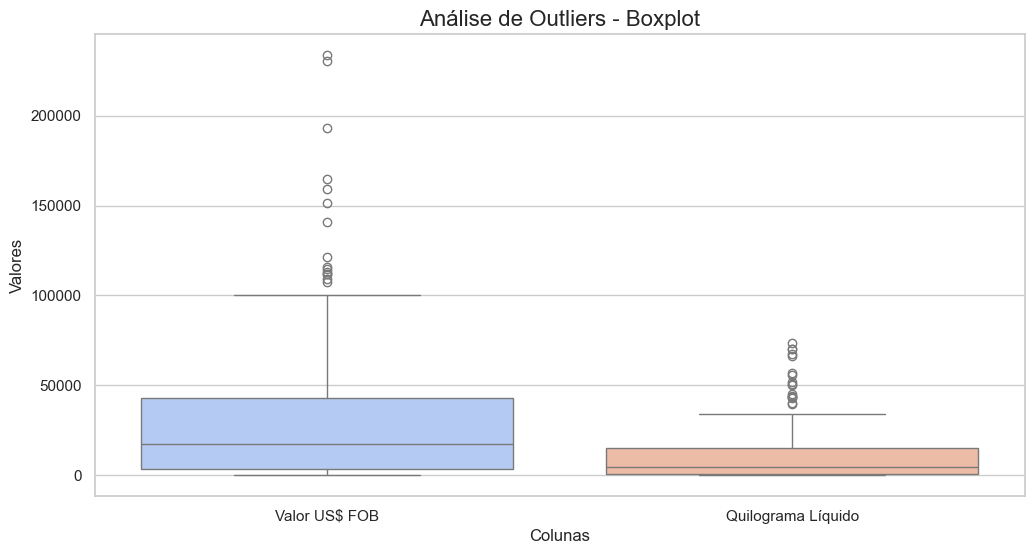

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Escolher as duas colunas que você deseja analisar
colunas_selecionadas = ['Valor US$ FOB', 'Quilograma Líquido']

# Criação de uma nova base de dados sem outliers
dataset_sem_outliers_outubro = dataset_exportacoes_rn_continente_outubro.copy()

# Calcular quartis e outliers para as colunas selecionadas
for coluna in colunas_selecionadas:
    print(f"\nAnálise de {coluna}:")

    # Calcular os quartis e a mediana
    Q1 = dataset_sem_outliers_outubro[coluna].quantile(0.25)
    Q3 = dataset_sem_outliers_outubro[coluna].quantile(0.75)
    Q2 = dataset_sem_outliers_outubro[coluna].median()

    # Calcular o IQR (Intervalo Interquartílico)
    IQR = Q3 - Q1

    # Definir limites para os outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar os outliers
    outliers = dataset_sem_outliers_outubro[(dataset_sem_outliers_outubro[coluna] < limite_inferior) |
                                                 (dataset_sem_outliers_outubro[coluna] > limite_superior)]

    # Exibir as estatísticas
    print(f"Q1 (25%): {Q1}")
    print(f"Q2 (Mediana): {Q2}")
    print(f"Q3 (75%): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Limite Inferior para Outliers: {limite_inferior}")
    print(f"Limite Superior para Outliers: {limite_superior}")
    print(f"Quantidade de Outliers detectados em {coluna}: {len(outliers)}")

    # Remover os outliers da nova base de dados
    dataset_sem_outliers_outubro = dataset_sem_outliers_outubro[(dataset_sem_outliers_outubro[coluna] >= limite_inferior) &
                                                (dataset_sem_outliers_outubro[coluna] <= limite_superior)]

# Exibir a descrição das colunas selecionadas
print("\nDescrição das colunas analisadas:")
print(dataset_exportacoes_rn_continente[colunas_selecionadas].describe())

# Exibir a descrição do dataset sem outliers
print("\nDescrição das colunas no dataset sem outliers:")
print(dataset_sem_outliers_outubro[colunas_selecionadas].describe())

# Configuração do gráfico
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Criar o boxplot para as duas colunas selecionadas
sns.boxplot(data=dataset_sem_outliers_outubro[colunas_selecionadas], palette="coolwarm")

# Título e rótulos
plt.title("Análise de Outliers - Boxplot", fontsize=16)
plt.xlabel("Colunas", fontsize=12)
plt.ylabel("Valores", fontsize=12)

# Exibir o gráfico
plt.show()



# Removendo outliers e criando duas bases
> Base 1 continua com outliers
>
> Base 2 sem outliers 

In [7]:
dataset_sem_outliers

,Bloco Econômico,Países,Via,URF,Código NCM,Descrição NCM,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Código Seção,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data
0,3,117,0,68,13021999,Outros sucos e extratos vegetais,130219,Sucos e extratos de outros vegetais (mamão sec...,57,495,12,27,1,17,8,3,0,0,2024-09-01
1,3,122,0,68,49111090,"Outros impressos publicitários, catálogos come...",491110,"Impressos publicitários, catálogos comerciais ...",229,383,44,33,9,12,8,5,0,0,2024-01-01
2,3,122,0,68,96110000,"Carimbos, incluindo os datadores e numeradores...",961100,"Carimbos, datadores, numeradores, sinetes e ar...",549,98,86,46,18,7,8,5,0,0,2024-01-01
3,3,122,0,68,61071200,"Cuecas e ceroulas, de malha, de uso masculino,...",610712,"Cuecas e ceroulas, de malha, de fibras sintéti...",276,153,55,83,10,6,5,5,0,1,2024-01-01
4,3,122,0,68,61072900,"Camisolões e pijamas, de malha, de uso masculi...",610729,"Camisolões e pijamas, de malha, de outras maté...",276,153,55,83,10,6,5,5,0,1,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57000,3,117,4,40,20098000,"Sucos de outras frutas, produtos hortícolas, n...",200980,Sucos de outras frutas ou de produtos hortícol...,78,497,19,61,3,16,8,92246,101185,0,1997-04-01
57001,3,57,4,34,5119990,"Outros produtos de animais, impróprios para al...",51199,"Outros produtos de origem animal, impróprios p...",19,453,4,51,0,0,8,10166,101660,0,1997-10-01
57002,3,117,4,23,8071900,Melões frescos,80719,Melões frescos,35,293,7,26,1,17,8,52736,102244,0,1997-04-01
57003,3,124,4,40,8071900,Melões frescos,80719,Melões frescos,35,293,7,26,1,17,8,45026,103338,0,1997-07-01


# Exportando bases de dados da etapa 2

In [11]:
dataset_exportacoes_rn_continente.to_csv("../../../data/interim/preprocessing/02_dataset_expo_rn_OUTLIERS.csv", index=False)
dataset_sem_outliers.to_csv("../../../data/interim/preprocessing/02_dataset_expo_rn_NO_OUTLIERS.csv", index=False)
dataset_sem_outliers_outubro.to_csv("../../../data/interim/preprocessing/02_dataset_expo_rn_outubro_NO_OUTLIERS.csv", index=False)